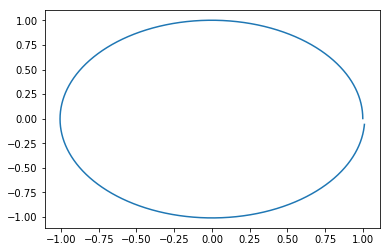

In [1]:
# 1. Euler's Rule¶
# So we have y[0]=x, y[1]=v_{x}, y[2]=y, y[3]=v_{y}

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

G=1.
M=1.
tend=2.*np.pi
h=0.001
y=[1.,0.,0.,1.] # initialize the position and velocity
t=0

def f(t, y):
    f=np.zeros(4)
    r=np.sqrt(y[0]*y[0]+y[2]*y[2]) #y[0] and y[2] are x and y
    #write four lines to calculate f[0],f[1],f[2],f[3]
    f[0] = y[1]
    f[1] = -G*M/r**3 * y[0]
    f[2] = y[3]
    f[3] = -G*M/r**3 * y[2]
    return f
    
def eu(t, h, y, n):
    fv=f(t, y)
    for i in range(n):
        #write one line to finish the forward Euler
        y[i] = y[i] + h*fv[i] #overwriting, fv is a vector
    return y

xp=[] # store x and y positions to make a plot
yp=[] 
while(t<tend):
    if((t+h)>tend): #if at end, last time step, go back and stop or zero
        h=tend-t
    y = eu(t,h,y,4)
    xp=np.append(xp,y[0])
    yp=np.append(yp,y[2])
    t = t+h

plt.plot(xp,yp)
plt.show()

In [3]:
# So we have y[0]=x, y[1]=v_{x}, y[2]=y, y[3]=v_{y}
import numpy as np
from vpython import * # must import vpython first

scene = canvas() # with this you don't need to restart kernel each time
gd = graph(x=0, y=0, width=600, height=600, 
      title='Orbit', xtitle='x', ytitle='y', 
      foreground=color.black, background=color.white, 
      xmax=2, xmin=-2, ymax=2, ymin=-2)

f1 = gcurve(color=color.cyan)	# a graphics curve  

G=1.
M=1.
tend=2.*np.pi
h=0.001
y=[1.,0.,0.,1.]
t=0

def f(t, y):
    f=np.zeros(4)
    r=np.sqrt(y[0]*y[0]+y[2]*y[2])
    f[0]=y[1]
    f[1]=-G*M/r/r/r*y[0]
    f[2]=y[3]
    f[3]=-G*M/r/r/r*y[2]
    return f
    
def eu(t, h, y, n):
    y+=h*f(t,y)
    return y
    # write Euler method
        
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = eu(t,h,y,4)
    t = t+h
    rate(500)
    f1.plot(pos=(y[0],y[2]))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

ERROR! Session/line number was not unique in database. History logging moved to new session 1725


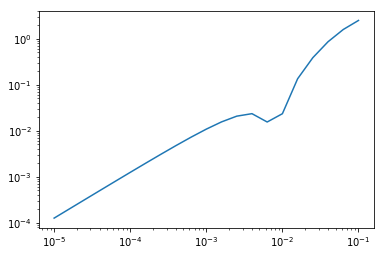

In [2]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

def f(t, y):
    f=np.zeros(4)
    r=np.sqrt(y[0]*y[0]+y[2]*y[2])
    f[0]=y[1]
    f[1]=-G*M/r/r/r*y[0]
    f[2]=y[3]
    f[3]=-G*M/r/r/r*y[2]
    return f
    
def eu(t, h, y, n):
    fv=f(t, y)
    for i in range(n):
        y[i]+=fv[i]*h
    return y

ha=[]
err=[]
for h in 10.**np.arange(-1.,-5.2,-0.2):
    ha=np.append(ha,h)
    G=1.
    M=1.
    tend=2.*np.pi
    y=[1.,0.,0.,1.]
    t=0
    while(t<tend):
        if((t+h)>tend):
            h=tend-t
        y = eu(t,h,y,4)
        t = t+h
    err=np.append(err,abs(y[0]-1.))

plt.plot(ha,err)
plt.xscale('log')
plt.yscale('log')
plt.show()

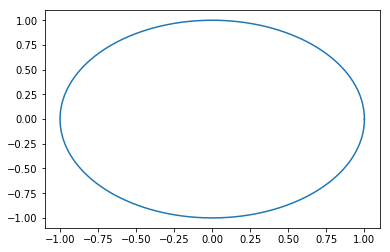

In [4]:
#2. Runge-Kutta Rule¶

import numpy as np
import matplotlib.pyplot as plt

G=1.
M=1.
tend=2.*np.pi
h=0.001
y=[1.,0.,0.,1.]
t=0

def f(t, y):
    f=np.zeros(4)
    r=np.sqrt(y[0]*y[0]+y[2]*y[2])
    f[0]=y[1]
    f[1]=-G*M/r/r/r*y[0]
    f[2]=y[3]
    f[3]=-G*M/r/r/r*y[2]
    return f
    
def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    # write 5 lines, 4 lines to calculate k1,..,k4 and one line to update y to finish RK-4
    k1 = h*f(t,y)
    k2 = h*f(t+h/2,y+k1/2)
    k3 = h*f(t+h/2,y+k2/2)
    k4 = h*f(t+h,y+k3)
    
    return (y+(k1+2*k2+2*k3+k4)/6)

xp=[]
yp=[]
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = rk4(t,h,y,4)
    xp=np.append(xp,y[0])
    yp=np.append(yp,y[2])
    t = t+h

plt.plot(xp,yp)
plt.show()

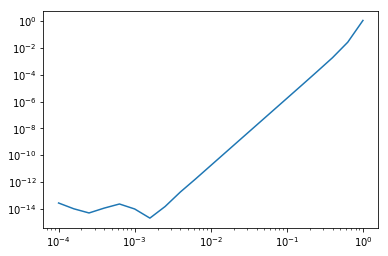

In [5]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()

ha=[]
err=[]
for h in 10.**np.arange(0.,-4.2,-0.2):
    ha=np.append(ha,h)
    G=1.
    M=1.
    tend=2.*np.pi
    y=[1.,0.,0.,1.]
    t=0
    while(t<tend):
        if((t+h)>tend):
            h=tend-t
        y = rk4(t,h,y,4)
        t = t+h
    err=np.append(err,abs(y[0]-1.))

plt.plot(ha,err)
plt.xscale('log')
plt.yscale('log')
plt.show()

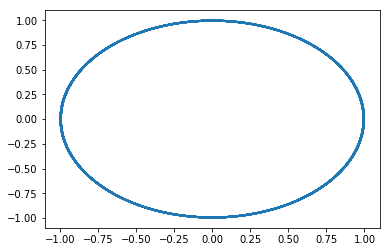

In [6]:
import numpy as np
import matplotlib.pyplot as plt

G=1.
M=1.
tend=2.*np.pi*50.
h=0.2
y=[1.,0.,0.,1.]
t=0

def f(t, y):
    f=np.zeros(4)
    r=np.sqrt(y[0]*y[0]+y[2]*y[2])
    f[0]=y[1]
    f[1]=-G*M/r/r/r*y[0]
    f[2]=y[3]
    f[3]=-G*M/r/r/r*y[2]
    return f
    
def rk4(t, h, y, n):
    k1 = np.zeros(n)
    k2 = np.zeros(n)
    k3 = np.zeros(n)
    k4 = np.zeros(n)
    k1=h*f(t,y)
    k2=h*f(t+0.5*h,y+0.5*k1)
    k3=h*f(t+0.5*h,y+0.5*k2)
    k4=h*f(t+h,y+k3)
    y+=(k1+2.*(k2+k3)+k4)/6.
    return y

xp=[]
yp=[]
ta=[]
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = rk4(t,h,y,4)
    xp=np.append(xp,y[0])
    yp=np.append(yp,y[2])
    ta=np.append(ta,t)
    t = t+h

plt.plot(xp,yp)
plt.show()

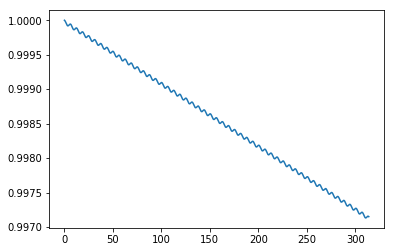

In [7]:
plt.plot(ta,np.sqrt(xp*xp+yp*yp))
plt.show()

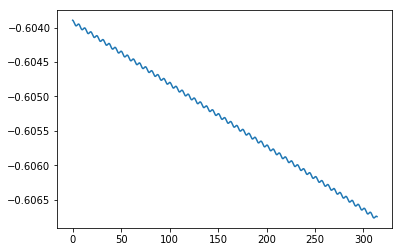

In [8]:
# plot the total energy
plt.plot(ta,0.5*(y[1]*y[1]+y[2]*y[2])-1./np.sqrt(xp*xp+yp*yp))
plt.show()

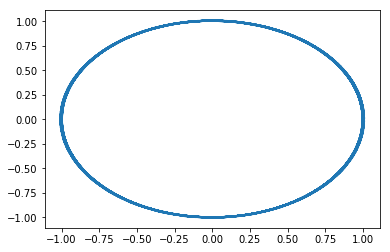

In [10]:
# 3. Leap frog¶

import numpy as np
import matplotlib.pyplot as plt

G=1.
M=1.
tend=2.*np.pi*50.
h=0.2
y=[1.,0.,0.,1.]
t=0

def f(t, y):
    f=np.zeros(4)
    r=np.sqrt(y[0]*y[0]+y[2]*y[2])
    f[0]=y[1]
    f[1]=-G*M/r/r/r*y[0]
    f[2]=y[3]
    f[3]=-G*M/r/r/r*y[2]
    return f
    
def lf(t, h, y, n):
    # drift step
    fv=f(t, y)
    for i in [0,2]:
        y[i]+=fv[i]*h/2.
    # Please finish kick and drift step
    # kick step
    fv=f(t, y)
    for i in [1,3]:
        y[i]+=fv[i]*h
    # drift step
    fv=f(t, y)
    for i in [0,2]:
        y[i]+=fv[i]*h/2.
    return y

xp=[]
yp=[]
ta=[]
while(t<tend):
    if((t+h)>tend):
        h=tend-t
    y = lf(t,h,y,4)
    xp=np.append(xp,y[0])
    yp=np.append(yp,y[2])
    ta=np.append(ta,t)
    t = t+h

plt.plot(xp,yp)
plt.show()

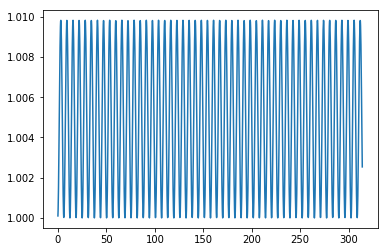

In [11]:

plt.plot(ta,np.sqrt(xp*xp+yp*yp))
plt.show()

In [ ]:
# plot the total energy
plt.plot(ta,1./2.*(y[1]*y[1]+y[3]*y[3])-1./np.sqrt(xp*xp+yp*yp))
plt.show()

In [ ]:
# Homework:
# Write your own leapfrog scheme to calculate the orbit of two equal mass binary.
# The mass of each binary makes GM_{i}=1, (i is 1 or 2). The two binary stars are
# seperated by a distance of 1 initially. Initialize the binary velocity so that
# each binary star will have an eccentricity of 0.5. Evolve this system to 100
# binary orbits, and plot their orbits in the x-y plane. (Hint: both stars will drift
# together first, and then being kicked at the middle step at the same time, 
# and then drfit again)